In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_sample_image

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

/home/vu/anaconda3/envs/universe/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vu/anaconda3/envs/universe/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vu/anaconda3/envs/universe/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vu/anaconda3/envs/universe/lib/python3.6/site-

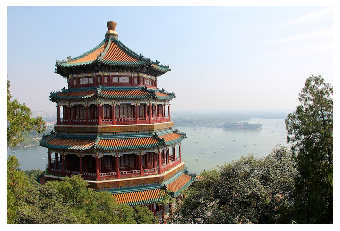

In [2]:
#import data and view
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
plot_image(china)

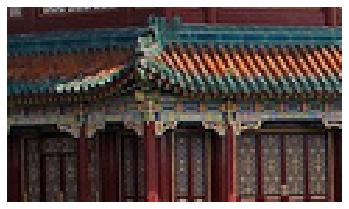

In [3]:
#get a part of original image
image = china[150:220, 130:250]
plot_image(image)

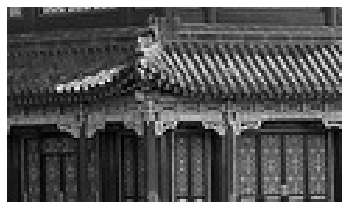

In [4]:
import numpy as np
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
plot_image(image_grayscale)

In [5]:
images = image_grayscale.reshape(1, height, width, 1)

## Filter

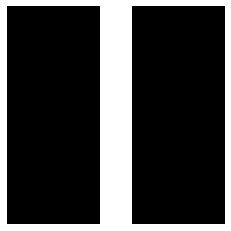

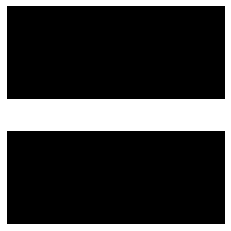

In [6]:
# we need to prepare two filter use to filter image above
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

#co the tuong tuong 4 chieu nhu dai 7, rong 7, mot lop(trang den), va co 2 buc anh

In [7]:
# filter our images
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap) #use filter had been prepare above
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})
    
#compare placeholder and variable:https://stackoverflow.com/questions/36693740/whats-the-difference-between-tf-placeholder-and-tf-variable
# tf.nn.conv2d vs tf.layers.conv2d:https://stackoverflow.com/questions/42785026/tf-nn-conv2d-vs-tf-layers-conv2d

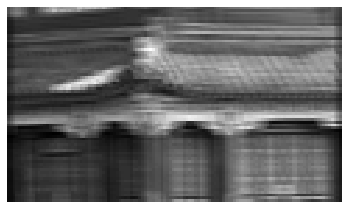

In [8]:
#results
plot_image(output[0, :, :, 1])

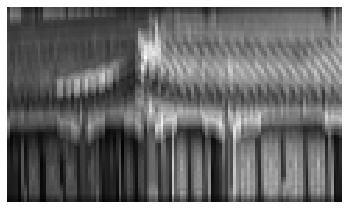

In [9]:
plot_image(output[0, :, :, 0])

## Pooling

In [10]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

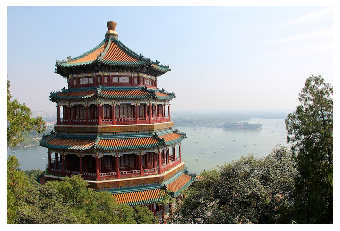

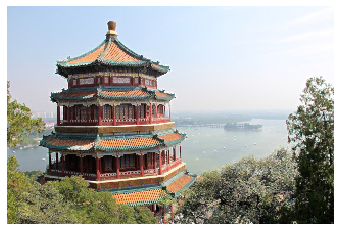

In [11]:
plot_color_image(dataset[0])
plt.show()
plot_color_image(output[0])
plt.show()

## pretrain

In [12]:
from tensorflow import keras
model = keras.applications.resnet50.ResNet50(weights="imagenet")

Instructions for updating:
Colocations handled automatically by placer.


In [48]:
x = load_sample_image("flower.jpg")
x = np.expand_dims(x, axis=0)

images_resized = tf.image.resize(x, [224, 224])
inputs = keras.applications.resnet50.preprocess_input(images_resized)

Y_proba = model.predict(inputs, steps=1)
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)

for class_id, name, y_proba in top_K[0]:
    print(" {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))

 n13040303 - stinkhorn    44.51%
 n03530642 - honeycomb    32.41%
 n02206856 - bee          5.05%
